# Análise e Exploração de dados

Esse script demonstra a exploração e análise dos dados desta base.

-------------------------------------------------------------------------------

### Base de dados: Operações de Cartão de Crédito

kaggle.com/mlg-ulb/creditcardfraud

284,807 instâncias sem fraude
492 instâncias com fraude

30 atributos

2 classes (com frause, sem fraude)


--------------------------------------------------------------------------------
Trabalho de Conclusão de Curso apresentado ao Curso de Especialização em Inteligência Artificial e Aprendizado de Máquina como requisito parcial à obtenção do título de especialista.
Eloyza Maria S. B. Generozo

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

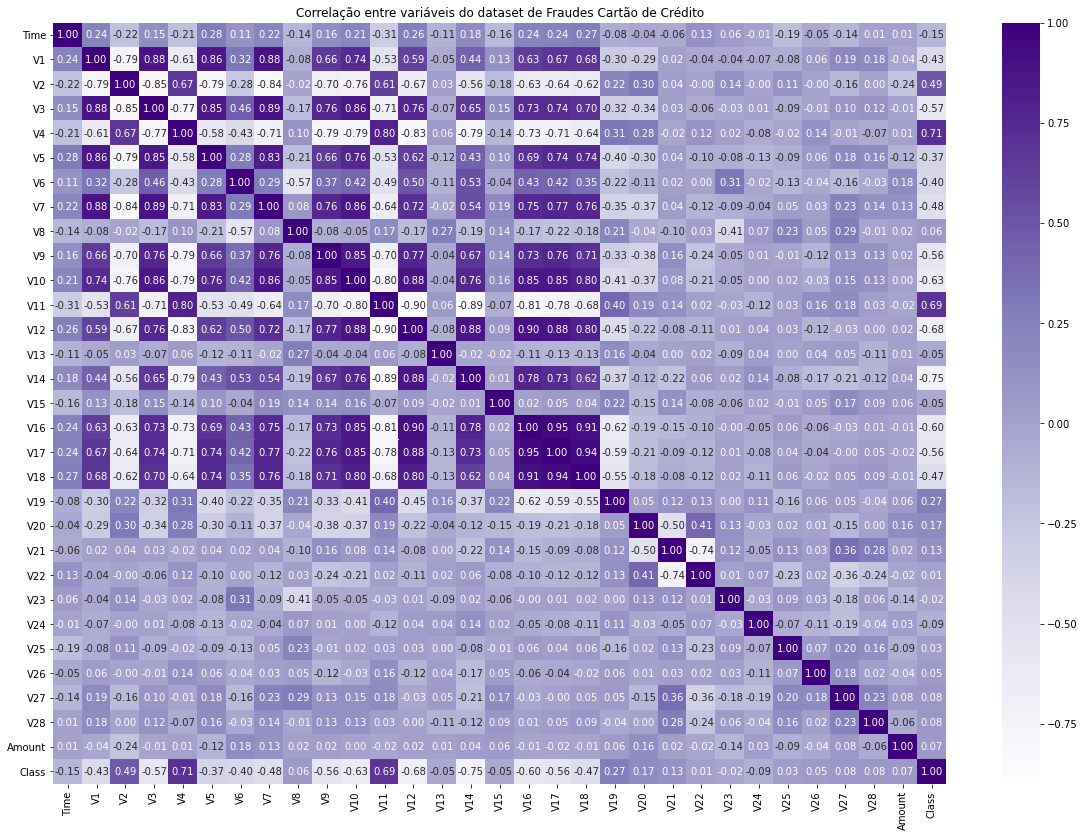

In [2]:
########## Aplicando um Oversampling Simples Randomico para avaliar correlação de variaveis ############

creditcard = pd.read_csv('creditcard.csv')

###### Normalizando campos Amount e Time ##############

creditcard['Amount'] = preprocessing.RobustScaler().fit_transform(creditcard['Amount'].values.reshape(-1, 1))
creditcard['Time'] = preprocessing.MinMaxScaler().fit_transform(creditcard['Time'].values.reshape(-1, 1))

creditcard.head()

### obtendo indices de cada classe ####
target_0 = creditcard[creditcard.Class == 0]
target_1 = creditcard[creditcard.Class == 1]

target_1_oversample = target_1.sample(len(target_0), replace=True)
test_oversample = pd.concat([target_1_oversample, target_0], axis=0)

plt.figure(figsize=(20, 14))
sns.heatmap(test_oversample.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Purples')
plt.title('Correlação entre variáveis do dataset de Fraudes Cartão de Crédito')
plt.show()

Text(0.5, 1.0, 'Histogram feature V14')
Text(0.5, 1.0, 'Histogram feature V14')


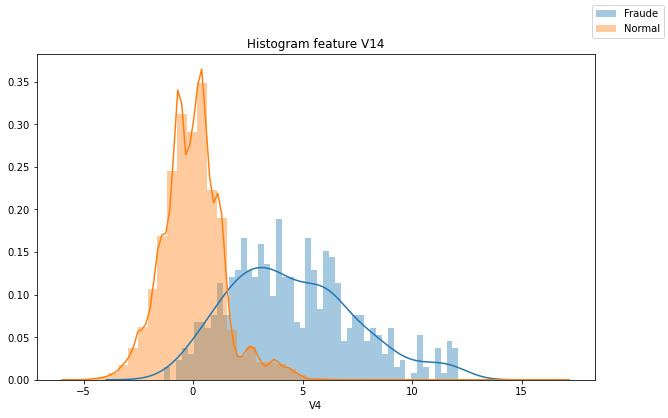

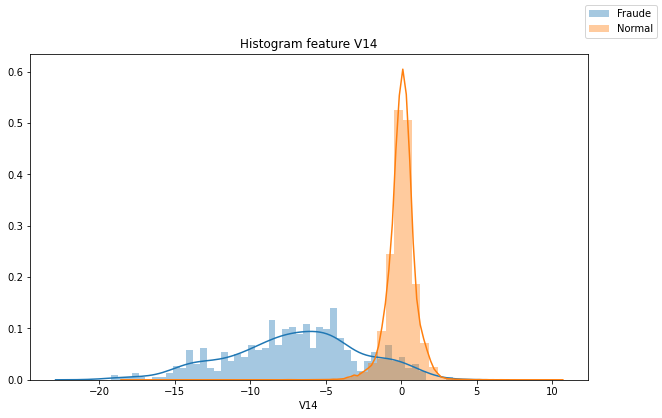

In [3]:
########## Avaliando no espaço a diferença de apresentação das variaveis com maiores correlação positiva e negativa ############


fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
sns.distplot(creditcard.V4[creditcard.Class == 1], bins=50, label='Fraude')
sns.distplot(creditcard.V4[creditcard.Class == 0], bins=50, label='Normal')
fig.legend(labels=['Fraude','Normal'])
print(ax.set_title('Histogram feature V14'))


fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
sns.distplot(creditcard.V14[creditcard.Class == 1], bins=50, label='Fraude')
sns.distplot(creditcard.V14[creditcard.Class == 0], bins=50, label='Normal')
fig.legend(labels=['Fraude','Normal'])
print(ax.set_title('Histogram feature V14'))

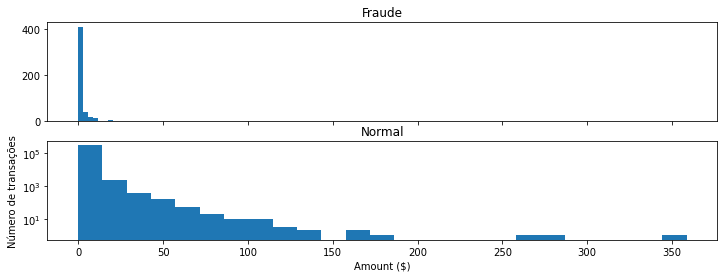

In [4]:
########## Avaliando visualmente variação de Valor da transação mediante classe ############


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(creditcard.Amount[creditcard.Class == 1])
ax1.set_title('Fraude')

ax2.hist(creditcard.Amount[creditcard.Class == 0], bins = 25)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Número de transações')
plt.yscale('log')
plt.show()


Time      0.012803
V1        0.000942
V2        0.000186
V3        0.009965
V4        0.056147
V5        0.005193
V6        0.001256
V7        0.015733
V8        0.017193
V9        0.000671
V10       0.006292
V11       0.003416
V12       0.034615
V13       0.011641
V14       0.733464
V15       0.000863
V16       0.000616
V17       0.000379
V18       0.005173
V19       0.008066
V20       0.012627
V21       0.008495
V22       0.008605
V23       0.002795
V24       0.001532
V25       0.010476
V26       0.013664
V27       0.011004
V28       0.005890
Amount    0.000297
dtype: float64


Text(0.5, 1.0, 'Importância de cada feature')

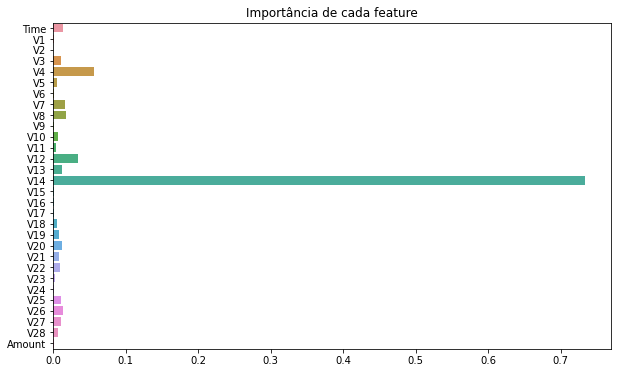

In [5]:
########## Aplicando um Oversampling Simples Randomico para avaliar a importância das features ############


## convertendo para labels únicos e sequencias
le = LabelEncoder()
X = test_oversample.iloc[:,0:(test_oversample.shape[1] - 1)]
y = le.fit_transform(test_oversample.iloc[:,(test_oversample.shape[1] - 1)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

importances = pd.Series(data=model.feature_importances_, index=X.keys())
print (importances)
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, orient='h', ax=ax).set_title('Importância de cada feature')